# 3D Tomography Experiments

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Medium

In [19]:
sensors.src_pos

array([[  0.        ,  67.55767087, 154.44966859],
       [  0.        ,  72.24915764, 148.95664334],
       [  0.        ,  76.49520433, 143.11246144],
       [  0.        ,  80.26963265, 136.95315422],
       [  0.        ,  83.54917199, 130.51669585],
       [  0.        ,  86.3136029 , 123.84276925],
       [  0.        ,  88.54588175, 116.97252139],
       [  0.        ,  90.2322458 , 109.94830963],
       [  0.        ,  91.36229804, 102.81344057],
       [  0.        ,  91.92907133,  95.61190305],
       [  0.        ,  91.92907133,  88.38809695],
       [  0.        ,  91.36229804,  81.18655943],
       [  0.        ,  90.2322458 ,  74.05169037],
       [  0.        ,  88.54588175,  67.02747861],
       [  0.        ,  86.3136029 ,  60.15723075],
       [  0.        ,  83.54917199,  53.48330415],
       [  0.        ,  80.26963265,  47.04684578],
       [  0.        ,  76.49520433,  40.88753856],
       [  0.        ,  72.24915764,  35.04335666],
       [  0.        ,  67.55767

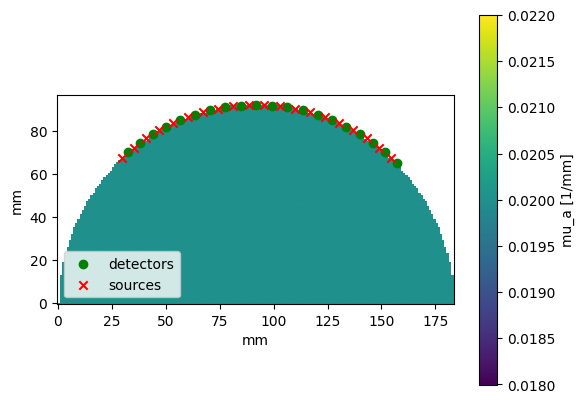

In [11]:
from problems.hemisphere import (
    hemisphere_2d_sensors,
    hemisphere_2d_medium,
)

medium = hemisphere_2d_medium()

noptodes = 20
sensors = hemisphere_2d_sensors(noptodes, medium)

medium.plot_mua(sensors, z_slice=medium.nz // 2)

## Forward

In [12]:
from solver import Solver, jacobian

solver = Solver(medium, sensors, tstart=0, tend=5e-9, tstep=5e-9)

In [13]:
nx, ny, nz = medium.nx, medium.ny, medium.nz
ndet, nsrc = sensors.ndet, sensors.nsrc
nt = solver.nt

In [14]:
# initialize arrays
J = np.zeros((nz, ny, nx, nt, ndet, nsrc))
data_bg = np.zeros((nt, ndet, nsrc))
data_true = np.zeros((nt, ndet, nsrc))

In [15]:
from tqdm.notebook import tqdm

nphoton = 1e5

# run forward for all sources (for both the ground truth and background)
for src_idx in tqdm(range(nsrc), desc="Processing sources"):
    solver.medium = medium
    res_bg, cfg_bg = solver.forward(src_idx, random_seed=1, nphoton=nphoton)
    J[..., src_idx] = jacobian(res_bg, cfg_bg)

Processing sources:   0%|          | 0/20 [00:00<?, ?it/s]

nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1


nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1
nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1


###############################################################################
#                      Monte Carlo eXtreme (MCX) -- CUDA                      #
#          Copyright (c) 2009-2025 Qianqian Fang <q.fang at neu.edu>          #
#                https://mcx.space/  &  https://neurojson.io                  #
#                                                                             #
# Computational Optics & Translational Imaging (COTI) Lab- http://fanglab.org #
#   Department of Bioengineering, Northeastern University, Boston, MA, USA    #
###############################################################################
#    The MCX Project is funded by the NIH/NIGMS under grant R01-GM114365      #
###############################################################################
#  Open-source codes and reusable scientific data are essential for research, #
# MCX proudly developed human-readable JSON-based data formats for easy reuse.#
#                                       

nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1
nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1
nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1


###############################################################################
#                      Monte Carlo eXtreme (MCX) -- CUDA                      #
#          Copyright (c) 2009-2025 Qianqian Fang <q.fang at neu.edu>          #
#                https://mcx.space/  &  https://neurojson.io                  #
#                                                                             #
# Computational Optics & Translational Imaging (COTI) Lab- http://fanglab.org #
#   Department of Bioengineering, Northeastern University, Boston, MA, USA    #
###############################################################################
#    The MCX Project is funded by the NIH/NIGMS under grant R01-GM114365      #
###############################################################################
#  Open-source codes and reusable scientific data are essential for research, #
# MCX proudly developed human-readable JSON-based data formats for easy reuse.#
#                                       

nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1
nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1


lization factor for detector 1 alpha=0.004473
normalization factor for detector 2 alpha=0.000593
normalization factor for detector 3 alpha=0.000050
normalization factor for detector 4 alpha=0.000055
normalization factor for detector 5 alpha=0.000567
normalization factor for detector 6 alpha=0.003865
normalization factor for detector 7 alpha=0.016861
normalization factor for detector 8 alpha=0.068418
normalization factor for detector 9 alpha=0.272618
normalization factor for detector 10 alpha=0.953963
normalization factor for detector 11 alpha=3.511270
normalization factor for detector 12 alpha=13.724053
normalization factor for detector 13 alpha=34.226715
normalization factor for detector 14 alpha=56.956303
normalization factor for detector 15 alpha=377.670258
normalization factor for detector 16 alpha=6783.194824
normalization factor for detector 17 alpha=58502.347656
normalization factor for detector 18 alpha=109150.640625
normalization factor for detector 19 alpha=308998.093750
norm

nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1
nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1


###############################################################################
#                      Monte Carlo eXtreme (MCX) -- CUDA                      #
#          Copyright (c) 2009-2025 Qianqian Fang <q.fang at neu.edu>          #
#                https://mcx.space/  &  https://neurojson.io                  #
#                                                                             #
# Computational Optics & Translational Imaging (COTI) Lab- http://fanglab.org #
#   Department of Bioengineering, Northeastern University, Boston, MA, USA    #
###############################################################################
#    The MCX Project is funded by the NIH/NIGMS under grant R01-GM114365      #
###############################################################################
#  Open-source codes and reusable scientific data are essential for research, #
# MCX proudly developed human-readable JSON-based data formats for easy reuse.#
#                                       

nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1
nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1


                                      #
#Please visit our free scientific data sharing portal at https://neurojson.io #
# and consider sharing your public datasets in standardized JSON/JData format #
###############################################################################
$Rev::0fcc04 $ v2025 $Date::2025-02-12 23:26:11 -05$ by $Author::Qianqian Fang$
###############################################################################
- code name: [Fermi MCX] compiled by nvcc [9.2] for CUDA-arch [350] on [Feb 13 2025]
- compiled with: RNG [xorshift128+] with Seed Length [4]

GPU=1 (NVIDIA A100-SXM4-40GB) threadph=0 extra=73216 np=73216 nthread=442368 maxgate=1 repetition=1
initializing streams ...	init complete : 1 ms
requesting 2560 bytes of shared memory
launching MCX simulation for time window [0.00e+00ns 5.00e+00ns] ...
simulation run# 1 ... 
kernel complete:  	21 ms
retrieving fields ... 	detected 73216 photons, total: 73216	transfer complete:	29 ms
normalizing raw data ...	norma

nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1
nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1


                                      #
#Please visit our free scientific data sharing portal at https://neurojson.io #
# and consider sharing your public datasets in standardized JSON/JData format #
###############################################################################
$Rev::0fcc04 $ v2025 $Date::2025-02-12 23:26:11 -05$ by $Author::Qianqian Fang$
###############################################################################
- code name: [Fermi MCX] compiled by nvcc [9.2] for CUDA-arch [350] on [Feb 13 2025]
- compiled with: RNG [xorshift128+] with Seed Length [4]

GPU=1 (NVIDIA A100-SXM4-40GB) threadph=0 extra=74922 np=74922 nthread=442368 maxgate=1 repetition=1
initializing streams ...	init complete : 1 ms
requesting 2560 bytes of shared memory
launching MCX simulation for time window [0.00e+00ns 5.00e+00ns] ...
simulation run# 1 ... 
kernel complete:  	20 ms
retrieving fields ... 	detected 74922 photons, total: 74922	transfer complete:	30 ms
normalizing raw data ...	norma

nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1
nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1


                                      #
#Please visit our free scientific data sharing portal at https://neurojson.io #
# and consider sharing your public datasets in standardized JSON/JData format #
###############################################################################
$Rev::0fcc04 $ v2025 $Date::2025-02-12 23:26:11 -05$ by $Author::Qianqian Fang$
###############################################################################
- code name: [Fermi MCX] compiled by nvcc [9.2] for CUDA-arch [350] on [Feb 13 2025]
- compiled with: RNG [xorshift128+] with Seed Length [4]

GPU=1 (NVIDIA A100-SXM4-40GB) threadph=0 extra=74402 np=74402 nthread=442368 maxgate=1 repetition=1
initializing streams ...	init complete : 1 ms
requesting 2560 bytes of shared memory
launching MCX simulation for time window [0.00e+00ns 5.00e+00ns] ...
simulation run# 1 ... 
kernel complete:  	23 ms
retrieving fields ... 	detected 74402 photons, total: 74402	transfer complete:	32 ms
normalizing raw data ...	norma

nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1
nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1


lization factor for detector 1 alpha=3.064385
normalization factor for detector 2 alpha=0.733482
normalization factor for detector 3 alpha=0.275634
normalization factor for detector 4 alpha=0.072133
normalization factor for detector 5 alpha=0.017003
normalization factor for detector 6 alpha=0.003545
normalization factor for detector 7 alpha=0.000541
normalization factor for detector 8 alpha=0.000052
normalization factor for detector 9 alpha=0.000052
normalization factor for detector 10 alpha=0.000543
normalization factor for detector 11 alpha=0.003380
normalization factor for detector 12 alpha=0.016414
normalization factor for detector 13 alpha=0.077435
normalization factor for detector 14 alpha=0.188438
normalization factor for detector 15 alpha=1.183293
normalization factor for detector 16 alpha=3.378603
normalization factor for detector 17 alpha=10.633826
normalization factor for detector 18 alpha=102.139221
normalization factor for detector 19 alpha=356.857697
normalization factor 

nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1
nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1
nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1


###############################################################################
#                      Monte Carlo eXtreme (MCX) -- CUDA                      #
#          Copyright (c) 2009-2025 Qianqian Fang <q.fang at neu.edu>          #
#                https://mcx.space/  &  https://neurojson.io                  #
#                                                                             #
# Computational Optics & Translational Imaging (COTI) Lab- http://fanglab.org #
#   Department of Bioengineering, Northeastern University, Boston, MA, USA    #
###############################################################################
#    The MCX Project is funded by the NIH/NIGMS under grant R01-GM114365      #
###############################################################################
#  Open-source codes and reusable scientific data are essential for research, #
# MCX proudly developed human-readable JSON-based data formats for easy reuse.#
#                                       

nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1
nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1


###############################################################################
#                      Monte Carlo eXtreme (MCX) -- CUDA                      #
#          Copyright (c) 2009-2025 Qianqian Fang <q.fang at neu.edu>          #
#                https://mcx.space/  &  https://neurojson.io                  #
#                                                                             #
# Computational Optics & Translational Imaging (COTI) Lab- http://fanglab.org #
#   Department of Bioengineering, Northeastern University, Boston, MA, USA    #
###############################################################################
#    The MCX Project is funded by the NIH/NIGMS under grant R01-GM114365      #
###############################################################################
#  Open-source codes and reusable scientific data are essential for research, #
# MCX proudly developed human-readable JSON-based data formats for easy reuse.#
#                                       

nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1
nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1


###############################################################################
#                      Monte Carlo eXtreme (MCX) -- CUDA                      #
#          Copyright (c) 2009-2025 Qianqian Fang <q.fang at neu.edu>          #
#                https://mcx.space/  &  https://neurojson.io                  #
#                                                                             #
# Computational Optics & Translational Imaging (COTI) Lab- http://fanglab.org #
#   Department of Bioengineering, Northeastern University, Boston, MA, USA    #
###############################################################################
#    The MCX Project is funded by the NIH/NIGMS under grant R01-GM114365      #
###############################################################################
#  Open-source codes and reusable scientific data are essential for research, #
# MCX proudly developed human-readable JSON-based data formats for easy reuse.#
#                                       

nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1
nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1


ource 1, normalization factor alpha=2000.000000
data normalization complete : 155 ms
simulated 100000 photons (100000) with 442368 threads (repeat x1)
MCX simulation speed: 2702.70 photon/ms
total simulated energy: 100000.00	absorbed: 43.35324%
(loss due to initial specular reflection is excluded in the total)
###############################################################################
#                      Monte Carlo eXtreme (MCX) -- CUDA                      #
#          Copyright (c) 2009-2025 Qianqian Fang <q.fang at neu.edu>          #
#                https://mcx.space/  &  https://neurojson.io                  #
#                                                                             #
# Computational Optics & Translational Imaging (COTI) Lab- http://fanglab.org #
#   Department of Bioengineering, Northeastern University, Boston, MA, USA    #
###############################################################################
#    The MCX Project is funded by the NIH/NIGMS 

nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1
nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1


ource 1, normalization factor alpha=2000.000000
data normalization complete : 151 ms
simulated 100000 photons (100000) with 442368 threads (repeat x1)
MCX simulation speed: 2702.70 photon/ms
total simulated energy: 100000.00	absorbed: 41.34067%
(loss due to initial specular reflection is excluded in the total)
###############################################################################
#                      Monte Carlo eXtreme (MCX) -- CUDA                      #
#          Copyright (c) 2009-2025 Qianqian Fang <q.fang at neu.edu>          #
#                https://mcx.space/  &  https://neurojson.io                  #
#                                                                             #
# Computational Optics & Translational Imaging (COTI) Lab- http://fanglab.org #
#   Department of Bioengineering, Northeastern University, Boston, MA, USA    #
###############################################################################
#    The MCX Project is funded by the NIH/NIGMS 

nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1
nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1
nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1


###############################################################################
#                      Monte Carlo eXtreme (MCX) -- CUDA                      #
#          Copyright (c) 2009-2025 Qianqian Fang <q.fang at neu.edu>          #
#                https://mcx.space/  &  https://neurojson.io                  #
#                                                                             #
# Computational Optics & Translational Imaging (COTI) Lab- http://fanglab.org #
#   Department of Bioengineering, Northeastern University, Boston, MA, USA    #
###############################################################################
#    The MCX Project is funded by the NIH/NIGMS under grant R01-GM114365      #
###############################################################################
#  Open-source codes and reusable scientific data are essential for research, #
# MCX proudly developed human-readable JSON-based data formats for easy reuse.#
#                                       

nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1
nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1


###############################################################################
#                      Monte Carlo eXtreme (MCX) -- CUDA                      #
#          Copyright (c) 2009-2025 Qianqian Fang <q.fang at neu.edu>          #
#                https://mcx.space/  &  https://neurojson.io                  #
#                                                                             #
# Computational Optics & Translational Imaging (COTI) Lab- http://fanglab.org #
#   Department of Bioengineering, Northeastern University, Boston, MA, USA    #
###############################################################################
#    The MCX Project is funded by the NIH/NIGMS under grant R01-GM114365      #
###############################################################################
#  Open-source codes and reusable scientific data are essential for research, #
# MCX proudly developed human-readable JSON-based data formats for easy reuse.#
#                                       

nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1
nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1
nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1


###############################################################################
#                      Monte Carlo eXtreme (MCX) -- CUDA                      #
#          Copyright (c) 2009-2025 Qianqian Fang <q.fang at neu.edu>          #
#                https://mcx.space/  &  https://neurojson.io                  #
#                                                                             #
# Computational Optics & Translational Imaging (COTI) Lab- http://fanglab.org #
#   Department of Bioengineering, Northeastern University, Boston, MA, USA    #
###############################################################################
#    The MCX Project is funded by the NIH/NIGMS under grant R01-GM114365      #
###############################################################################
#  Open-source codes and reusable scientific data are essential for research, #
# MCX proudly developed human-readable JSON-based data formats for easy reuse.#
#                                       

nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1
nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1


ource 1, normalization factor alpha=2000.000000
data normalization complete : 153 ms
simulated 100000 photons (100000) with 442368 threads (repeat x1)
MCX simulation speed: 2702.70 photon/ms
total simulated energy: 100000.00	absorbed: 36.97467%
(loss due to initial specular reflection is excluded in the total)
###############################################################################
#                      Monte Carlo eXtreme (MCX) -- CUDA                      #
#          Copyright (c) 2009-2025 Qianqian Fang <q.fang at neu.edu>          #
#                https://mcx.space/  &  https://neurojson.io                  #
#                                                                             #
# Computational Optics & Translational Imaging (COTI) Lab- http://fanglab.org #
#   Department of Bioengineering, Northeastern University, Boston, MA, USA    #
###############################################################################
#    The MCX Project is funded by the NIH/NIGMS 

nphoton: 100000
tstart: 0
tstep: 5e-09
tend: 5e-09
maxdetphoton: 100000
issrcfrom0: 1
replaydet: -1
issavedet: 1
issaveseed: 1


                                      #
#Please visit our free scientific data sharing portal at https://neurojson.io #
# and consider sharing your public datasets in standardized JSON/JData format #
###############################################################################
$Rev::0fcc04 $ v2025 $Date::2025-02-12 23:26:11 -05$ by $Author::Qianqian Fang$
###############################################################################
- code name: [Fermi MCX] compiled by nvcc [9.2] for CUDA-arch [350] on [Feb 13 2025]
- compiled with: RNG [xorshift128+] with Seed Length [4]

GPU=1 (NVIDIA A100-SXM4-40GB) threadph=0 extra=100000 np=100000 nthread=442368 maxgate=1 repetition=1
initializing streams ...	init complete : 1 ms
requesting 2560 bytes of shared memory
launching MCX simulation for time window [0.00e+00ns 5.00e+00ns] ...
simulation run# 1 ... 
kernel complete:  	141 ms
retrieving fields ... 	detected 38047 photons, total: 38047	transfer complete:	147 ms
normalizing raw data ...	s

## SVD

In [16]:
J_cpu = J.reshape((nz * ny * nx * nt, ndet * nsrc))
J_cpu.shape

(16928, 400)

In [17]:
from guti.svd import compute_svd_gpu

s = compute_svd_gpu(J_cpu)

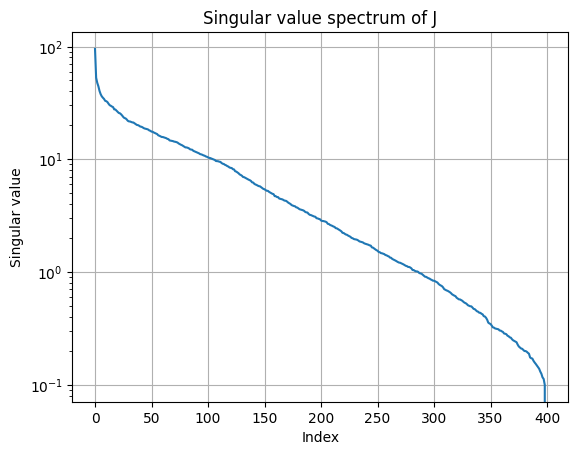

In [18]:
from guti.svd import plot_svd

plot_svd(s)

## Save the singular value spectrum

In [11]:
from guti.data_utils import save_svd

save_svd(s, "fnirs_cw")

Saved singular value spectrum to /home/rhotter/gut-of-imaging/results/fnirs_cw_svd_spectrum.npz
